In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def sky_averaged_sigmasq_ratio(k, r, relative_to_no_confusion=False):
    # k is the ASD ratio between the confusion noise and detector noise.
    k = k**2 - 1 # convert to PSD ratio
    if relative_to_no_confusion == False:
        ratio = 2*(1+k-k*r**2)/((1+k)**2-(k*r)**2)*(1+k)
    else:
        ratio = 2*(1+k-k*r**2)/((1+k)**2-(k*r)**2)
    return ratio

100%|██████████| 500/500 [00:00<00:00, 1100.49it/s]


[[2.         2.         2.         ... 2.         2.         2.        ]
 [2.         1.99999998 1.99999997 ... 1.99999802 1.99999802 1.99999802]
 [2.         1.99999994 1.99999987 ... 1.99999206 1.99999206 1.99999207]
 ...
 [2.         1.99603794 1.99210349 ... 1.29490757 1.29442818 1.29395014]
 [2.         1.99602198 1.99207168 ... 1.29081446 1.29032839 1.28984369]
 [2.         1.99600599 1.99203981 ... 1.28669856 1.28620574 1.28571429]]
2.0000000000000004


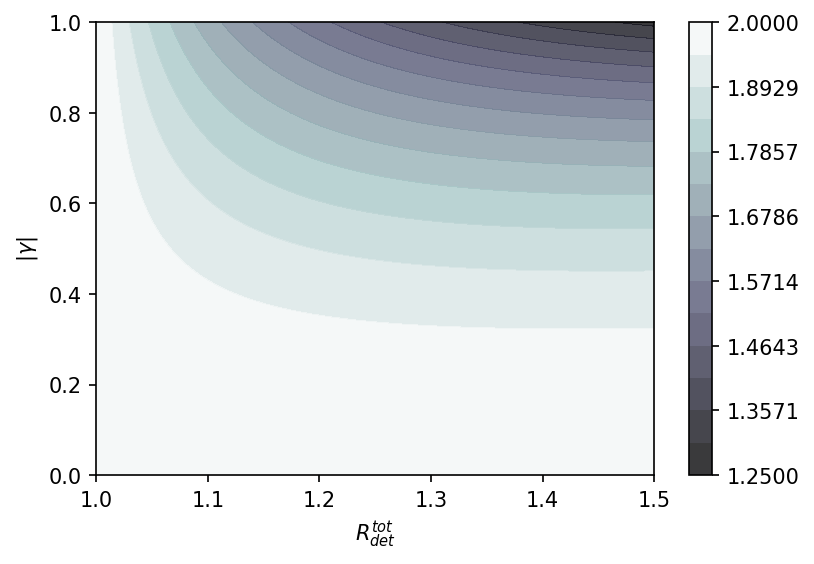

In [3]:
nx = 500
ny = 500
k_array = np.linspace(1, 1.5, nx)
r_array = np.linspace(0, 1, ny)
K, R = np.meshgrid(k_array, r_array)
effective_num_1 = np.zeros((nx,ny))
effective_num_2 = np.zeros((nx,ny))

for i in tqdm(range(len(K))):
    for j in range(len(R)):
        effective_num_1[i][j] = sky_averaged_sigmasq_ratio(K[i][j], R[i][j], relative_to_no_confusion=False)

print(effective_num_1)
print(np.max(effective_num_1))

fig, ax = plt.subplots(dpi=150)
CS1 = ax.contourf(K, R, effective_num_1, alpha=0.8, cmap=plt.cm.bone, levels=np.linspace(1.25, 2, 15))
cbar = fig.colorbar(CS1)
plt.xlabel(r"$R_{det}^{tot}$")
plt.ylabel(r"$\left | \gamma \right |$")
plt.savefig("correlated_noise_network_snr_loss.pdf", dpi=500)
plt.show()

100%|██████████| 500/500 [00:00<00:00, 1176.52it/s]


[[2.         1.995998   1.992008   ... 0.89126878 0.89007764 0.88888889]
 [2.         1.99599798 1.99200797 ... 0.89126789 0.89007676 0.88888801]
 [2.         1.99599794 1.99200787 ... 0.89126524 0.89007411 0.88888536]
 ...
 [2.         1.99204387 1.98414305 ... 0.57705535 0.57607079 0.57508895]
 [2.         1.99202794 1.98411136 ... 0.57523131 0.57424623 0.57326386]
 [2.         1.99201198 1.98407962 ... 0.57339713 0.57241149 0.57142857]]
2.0


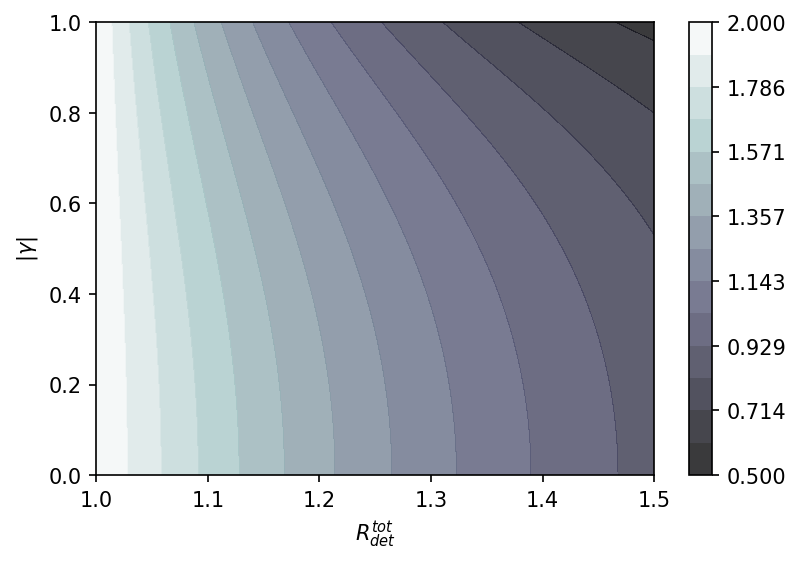

In [4]:
for i in tqdm(range(len(K))):
    for j in range(len(R)):
        effective_num_2[i][j] = sky_averaged_sigmasq_ratio(K[i][j], R[i][j], relative_to_no_confusion=True)

print(effective_num_2)
print(np.max(effective_num_2))

fig, ax = plt.subplots(dpi=150)
CS2 = ax.contourf(K, R, effective_num_2, alpha=0.8, cmap=plt.cm.bone, levels=np.linspace(0.5, 2, 15))
cbar = fig.colorbar(CS2)
plt.xlabel(r"$R_{det}^{tot}$")
plt.ylabel(r"$\left | \gamma \right |$")
plt.savefig("correlated_noise_network_snr_loss_optimal.pdf", dpi=500)
plt.show()

## Plot together

/tmp/ipykernel_3756/2437192056.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


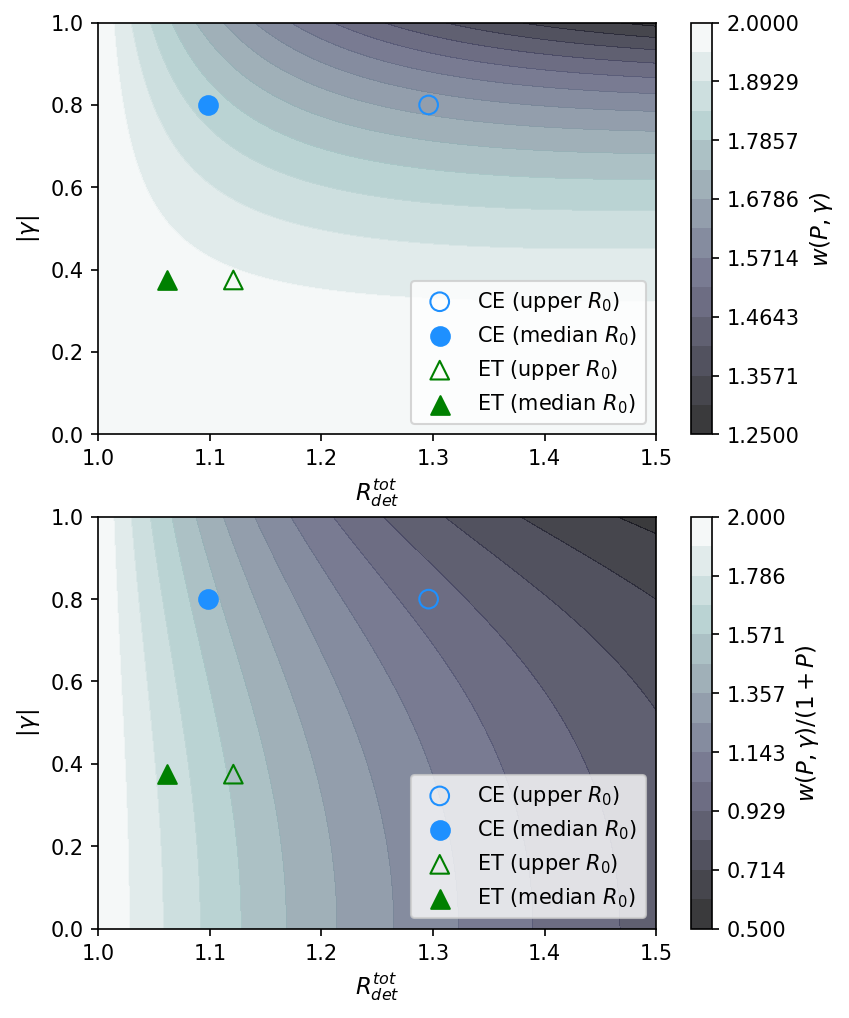

In [19]:
f = plt.figure(figsize=(6, 8), dpi=150)
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

ax1.contourf(K, R, effective_num_1, alpha=0.8, cmap=plt.cm.bone, levels=np.linspace(1.25, 2, 15))
cbar = plt.colorbar(CS1, ax=ax1)
cbar.set_label(r"$w(P,\gamma)$", fontsize=11)
ax1.set_xlabel(r"$R_{det}^{tot}$", fontsize=11)
ax1.set_ylabel(r"$\left | \gamma \right |$", fontsize=11)
ax1.scatter(1.296102010878164, 0.8, s=80, edgecolors='dodgerblue', facecolors='none', marker="o", label="CE (upper $R_0$)")
ax1.scatter(1.0984220307218, 0.8, s=80, edgecolors='dodgerblue', facecolors='dodgerblue', marker="o", label="CE (median $R_0$)")
ax1.scatter(1.1211324212451903, 0.375, s=80, edgecolors='green', facecolors='none', marker="^", label="ET (upper $R_0$)")
ax1.scatter(1.0620993931245062, 0.375, s=80, edgecolors='green', facecolors='green', marker="^", label="ET (median $R_0$)")
ax1.legend(loc="lower right")

ax2.contourf(K, R, effective_num_2, alpha=0.8, cmap=plt.cm.bone, levels=np.linspace(0.5, 2, 15))
cbar = plt.colorbar(CS2, ax=ax2)
cbar.set_label(r"$w(P,\gamma)/(1+P)$", fontsize=11)
ax2.set_xlabel(r"$R_{det}^{tot}$", fontsize=11)
ax2.set_ylabel(r"$\left | \gamma \right |$", fontsize=11)
ax2.scatter(1.296102010878164, 0.8, s=80, edgecolors='dodgerblue', facecolors='none', marker="o", label="CE (upper $R_0$)")
ax2.scatter(1.0984220307218, 0.8, s=80, edgecolors='dodgerblue', facecolors='dodgerblue', marker="o", label="CE (median $R_0$)")
ax2.scatter(1.1211324212451903, 0.375, s=80, edgecolors='green', facecolors='none', marker="^", label="ET (upper $R_0$)")
ax2.scatter(1.0620993931245062, 0.375, s=80, edgecolors='green', facecolors='green', marker="^", label="ET (median $R_0$)")
ax2.legend(loc="lower right")

f.savefig('correlated_noise_network_snr_loss_all.pdf', dpi=500)
f.show()